# Loading packages 

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.preprocessing import PowerTransformer, StandardScaler
import datetime
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from IPython.display import Image
pd.set_option("display.max_columns", None)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline
%reload_ext pycodestyle_magic
%pycodestyle_on

In [2]:
final_dataset = pd.read_csv("datasets/clustering_dataset.csv",
                            index_col='customer_unique_id')

In [3]:
final_dataset.head()

,mean_desc_name_len,product_category_name,payment_type,monetary_value,mean_review_score,mean_photos_qty,nb_items,nb_unique_items,price,freight_value,mean_prod_name_len,customer_zip_code_prefix,customer_city,customer_state,review_nb,comment_msg_nb,payment_type_nb,payment_instlmt_nb,latitude,longitude,frequency,recency,day,month,hour
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,236.0,bed_bath_table,credit_card,141.90,5.0,1.0,1.0,1.0,129.90,12.00,60.0,7787,cajamar,SP,1.0,1.0,1.0,8.0,-23.337679,-46.826739,1,112,10,5,10
0000b849f77a49e4a4ce2b2a4ca5be3f,635.0,health_beauty,credit_card,27.19,4.0,1.0,1.0,1.0,18.90,8.29,56.0,6053,osasco,SP,1.0,0.0,1.0,1.0,-23.557876,-46.788754,1,115,7,5,11
0000f46a3911fa3c0805444483337064,177.0,stationery,credit_card,86.22,3.0,3.0,1.0,1.0,69.00,17.22,49.0,88115,sao jose,SC,1.0,0.0,1.0,8.0,-27.543787,-48.631973,1,537,10,3,21
0000f6ccb0745a6a4b88665a16c9f078,1741.0,telephony,credit_card,43.62,4.0,5.0,1.0,1.0,25.99,17.63,43.0,66812,belem,PA,1.0,1.0,1.0,4.0,-1.307764,-48.482884,1,321,12,10,20
0004aac84e0df4da2b147fca70cf8255,794.0,telephony,credit_card,196.89,5.0,3.0,1.0,1.0,180.00,16.89,58.0,18040,sorocaba,SP,1.0,0.0,1.0,6.0,-23.506140,-47.470475,1,288,14,11,19


# 1. Rule-based segmentation model : RFM

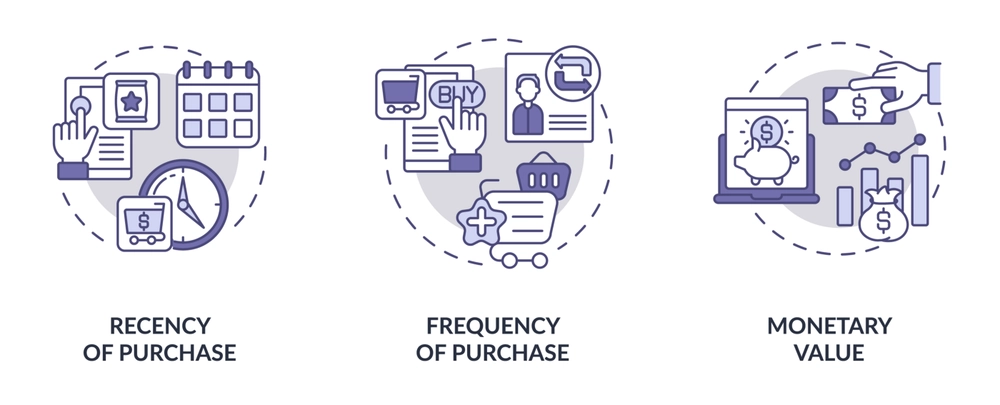

In [4]:
Image(filename='images/rfm_segment.png', width=600)

Behavioral customer segmentation based on three metrics :
- Recency of purchase (R) : days since last customer transaction
- Frequency of purchase (F) : Total number during the whole period
- Monetary value (M) : Total spend during the whole period

In [5]:
rfm_table = final_dataset[['recency', 'frequency', 'monetary_value']]
print("rfm_table shape :", rfm_table.shape)
rfm_table.head()

rfm_table shape : (91252, 3)


,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [6]:
rfm_table['frequency'].value_counts()

1     88501
2      2530
3       174
4        28
5         9
6         5
7         3
9         1
15        1
Name: frequency, dtype: int64

We cannot split the frequency feature into quartile as the distribution is highly skewed. According to the distribution of the variable, we will cut it as follows : 
- R = 1 if the customer did 1 order
- R = 2 if the customer did 2 orders
- R = 3 if the customer between 3 and 5
- R = 4 if the customer did 6 or more orders

In [7]:
def join_rfm(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))


r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(rfm_table['recency'], 4, labels=r_labels).values

f_slices = pd.cut(rfm_table['frequency'],
                  bins=[0, 1, 2, 5, np.inf],
                  labels=f_labels).values

m_quartiles = pd.qcut(rfm_table['monetary_value'], 4, labels=m_labels).values

rfm_table = rfm_table.assign(R=r_quartiles)
rfm_table = rfm_table.assign(F=f_slices)
rfm_table = rfm_table.assign(M=m_quartiles)
rfm_table['rfm_segment'] = rfm_table.apply(join_rfm, axis=1)
rfm_table['rfm_score'] = rfm_table[['R', 'F', 'M']].sum(axis=1)
rfm_table.head()

,recency,frequency,monetary_value,R,F,M,rfm_segment,rfm_score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3,413,8
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,6
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,4
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,4
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,7


In [8]:
rfm_table.groupby('rfm_segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count'],
}).round(1)

recency frequency monetary_value      
               mean      mean           mean count
rfm_segment                                       
111           454.9       1.0           43.3  5640
112           447.3       1.0           82.1  5670
113           452.8       1.0          136.8  5275
114           453.5       1.0          390.6  5402
121           435.0       2.0           45.9   147
122           438.6       2.0           83.4   200
123           430.2       2.0          136.6   202
124           439.3       2.0          321.7   149
131           472.1       3.2           37.8    18
132           426.5       3.1           82.6    21
133           428.1       3.3          137.6    14
134           410.1       3.1          370.3    19
141           602.0       6.0           18.6     1
143           365.0       6.0          116.6     2
211           277.0       1.0           43.4  5439
212           277.6       1.0           81.9  5630
213           278.2       1.0          137.2  5468
214           278.8       1.0          371.9  5474
221           286.5       2.0           49.7   130
222           283.1       2.0           84.1   236
223           280.1       2.0          134.9   211
224           278.7       2.0          311.1   185
231           285.7       3.2           45.1    18
232           282.4       3.2           84.3    16
233           286.3       3.4          135.5    19
234           288.2       3.0          260.0     4
241           304.0      10.5           53.9     2
242           247.0       7.0           91.8     1
243           262.7       7.3          134.6     3
311           168.9       1.0           43.1  5599
312           166.7       1.0           81.9  5292
313           166.1       1.0          138.2  5488
314           166.3       1.0          371.3  5514
321           172.4       2.0           44.2   116
322           175.7       2.0           82.4   220
323           171.4       2.0          136.6   205
324           170.9       2.0          290.1   169
331           183.3       3.3           45.8     7
332           169.1       3.3           80.7    19
333           163.6       3.4          133.1    14
334           164.0       3.2          280.3    16
343           194.0       7.0          159.2     1
411            57.1       1.0           42.9  5619
412            57.3       1.0           82.2  5435
413            59.3       1.0          137.2  5773
414            59.0       1.0          387.1  5783
421            74.0       2.0           44.6    69
422            67.1       2.0           83.1   100
423            66.1       2.0          134.5   100
424            70.2       2.0          336.4    91
431            65.6       3.0           41.2     8
432            67.7       3.0           78.8     3
433            74.6       3.0          131.0     9
434            69.2       3.3          389.3     6

In [9]:
ddd = rfm_table.groupby('rfm_score').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
}).round(1).reset_index()
ddd

rfm_score recency frequency monetary_value       
               mean      mean           mean  count
0         3   454.9       1.0           43.3   5640
1         4   364.8       1.0           62.9  11256
2         5   298.5       1.0           85.9  16852
3         6   239.7       1.0          160.4  22375
4         7   171.5       1.0          195.6  17085
5         8   115.7       1.1          248.6  11845
6         9    62.7       1.1          379.3   6076
7        10    84.4       2.3          311.4    117
8        11    69.2       3.3          389.3      6

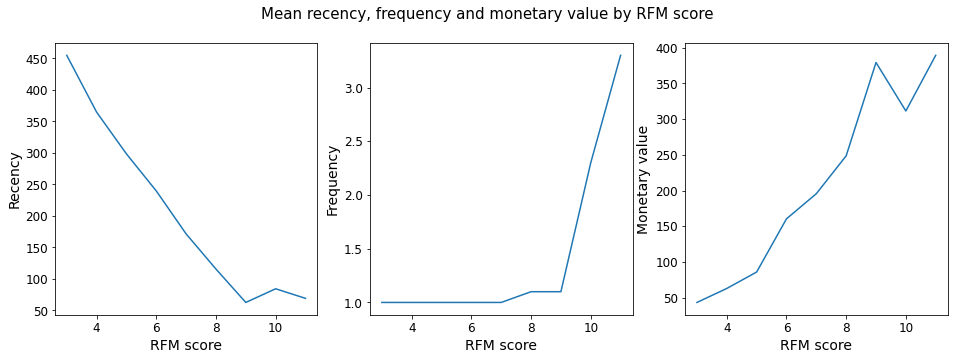

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Mean recency, frequency and monetary value by RFM score',
             fontsize=15)
ax1.plot(ddd.rfm_score, ddd.recency)
ax1.set(ylabel='Recency')
ax2.plot(ddd.rfm_score, ddd.frequency)
ax2.set(ylabel='Frequency')
ax3.plot(ddd.rfm_score, ddd.monetary_value['mean'])
ax3.set(ylabel='Monetary value')
for ax in (ax1, ax2, ax3):
    ax.set(xlabel='RFM score')
plt.show()

In [11]:
def custom_segment(df):
    if df['rfm_score'] >= 9:
        return '1. gold'
    elif (df['rfm_score'] >= 6) and (df['rfm_score'] < 9):
        return '2. silver'
    else:
        return '3. bronze'


rfm_table['general_segment'] = rfm_table.apply(custom_segment, axis=1)

ddd = rfm_table.groupby('general_segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
}).round(1).reset_index()
ddd

general_segment recency frequency monetary_value       
                     mean      mean           mean  count
0         1. gold    63.1       1.1          378.0   6199
1       2. silver   188.3       1.0          192.5  51305
2       3. bronze   346.8       1.0           71.1  33748

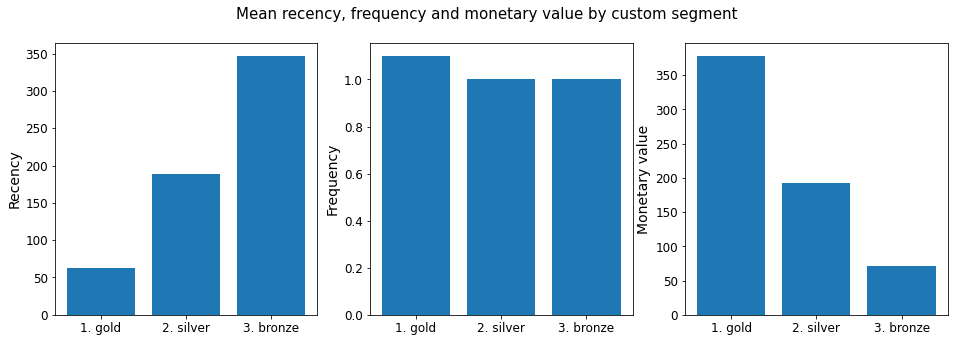

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Mean recency, frequency and monetary value by custom segment',
             fontsize=15)
ax1.bar(ddd.general_segment, ddd.recency['mean'])
ax1.set(ylabel='Recency')
ax2.bar(ddd.general_segment, ddd.frequency['mean'])
ax2.set(ylabel='Frequency')
ax3.bar(ddd.general_segment, ddd.monetary_value['mean'])
ax3.set(ylabel='Monetary value')
plt.show()

#  2. Unsupervised segmentation model

## 2.1 K-Means

Now let's play with K-Means algorithm, using all numerical features we have in our dataset. K-Means is one of the most popular unsupervised learning method, it's simple and fast, and works pretty well, with certain assumptions about the data :
- their distributions are symmetric (not skewed)
- they have the same mean (around 0)
- they have the same variance (around 1)

__Power Transformation__

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

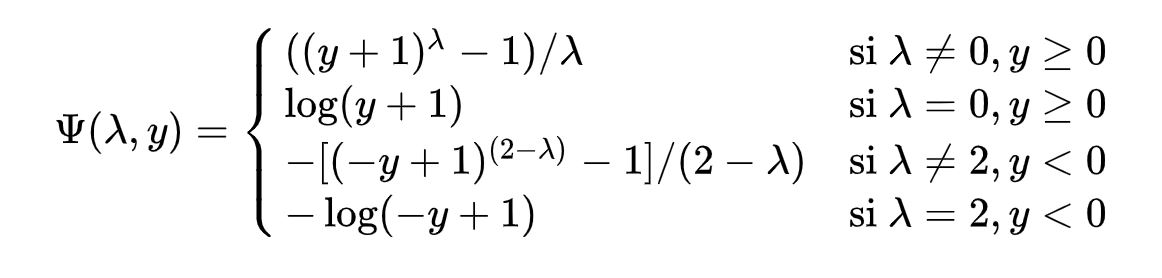

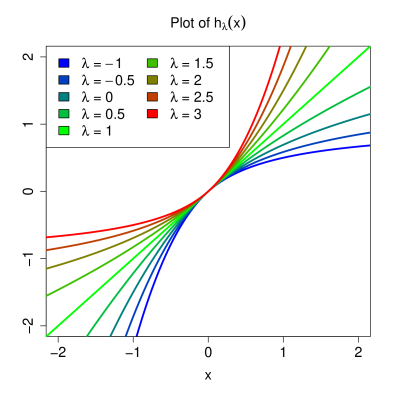

In [13]:
display(Image(filename='images/yeo_johnson_transformation.JPG', width=450))
display(Image(filename='images/graph_yeo_johnson.png'))

C:\Users\Quentin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


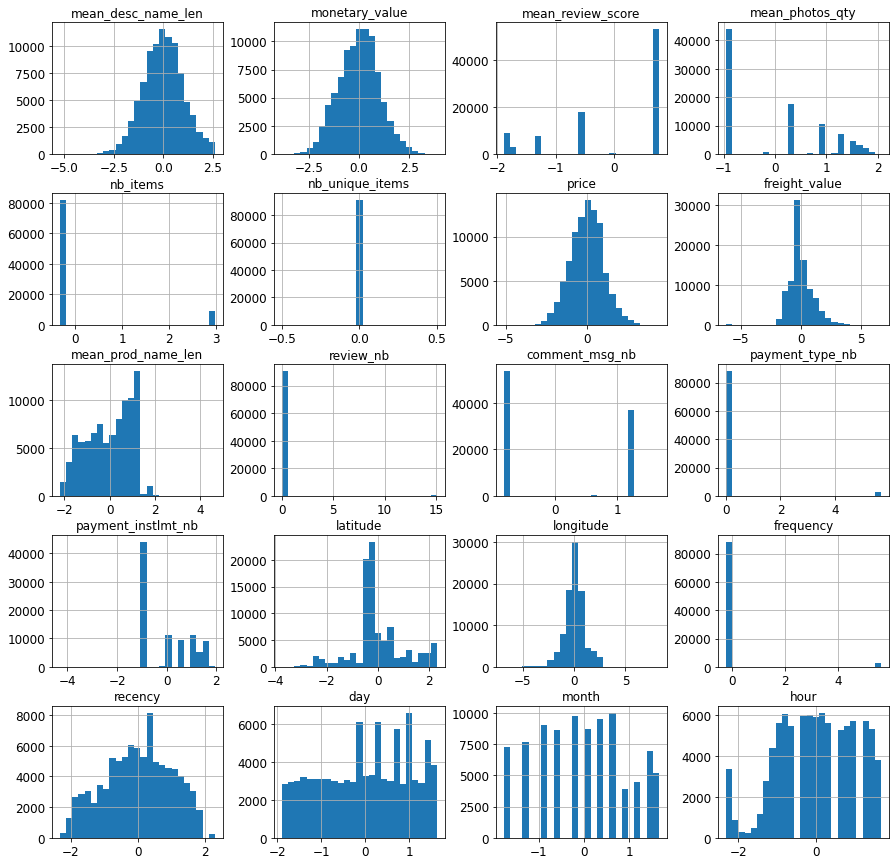

In [14]:
# Subset with only numerical attributes
num_dataset = final_dataset.select_dtypes(exclude=['object'])
num_dataset = num_dataset.drop('customer_zip_code_prefix', axis=1)

# Instantiate PowerTransformer class
pt = PowerTransformer(method='yeo-johnson')

# Transform our features
features = num_dataset.columns
num_dataset_pt = pd.DataFrame(
    data=pt.fit_transform(num_dataset),
    columns=features)

# Plot feature distributions once transformed
num_dataset_pt.hist(figsize=(15, 15), bins=25)
plt.show()

__Note :__ 4 variables among 20 remains highly skewed even after power transformation.

In [15]:
desc_skewness = num_dataset_pt.agg(['mean', 'std', 'skew']).T
desc_skewness[desc_skewness['skew'] > 0.5]

,mean,std,skew
nb_items,-1.348654e-09,1.000005,2.648232
review_nb,6.629045e-02,0.997806,14.985756
payment_type_nb,1.756378e-01,0.984460,5.426706
frequency,-4.026006e-02,0.999195,5.495686


Let's fit PCA to get uncorrelated components, to avoid multicollinearity issue

In [16]:
pca = PCA(.99)
X_pca = pca.fit_transform(num_dataset_pt)

In [17]:
X_pca.shape

(91252, 18)

The combination of k-means++ method, allowing centroids to be optimally spread, the maximum number of iterations to move centroids fixed to 300 and the repetition of the process 10 times should be sufficient to assume the clusters are stable.

In [18]:
k_range = range(2, 11)
kmeans_per_k = []
for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=1, init="k-means++",
                    n_init=10, max_iter=300).fit(X_pca)
    kmeans_per_k.append(kmeans)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:31<00:00,  3.52s/it]


A good approach to select the optimial number of clusters is to look at the __silhouette score__, which is the mean silhouette coefficient over all the instances. 

An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster).

The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $k$:

In [17]:
silhouette_scores = [silhouette_score(X_pca, model.labels_)
                     for model in tqdm(kmeans_per_k)]

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [17:46<00:00, 118.52s/it]


In [18]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

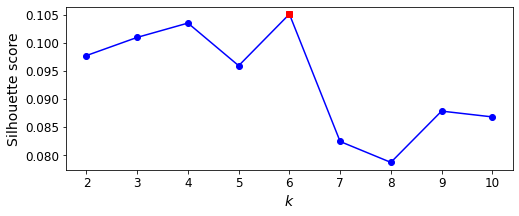

In [19]:
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [20]:
best_k

6

It looks like the best number of clusters is 6, but 4 clusters might be a good choice as well.

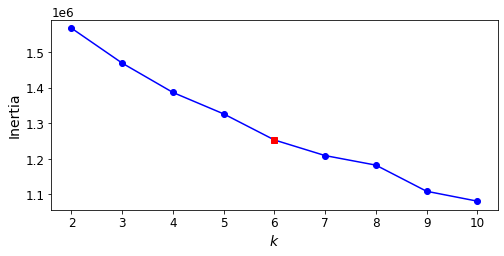

In [21]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [09:02<00:00, 135.54s/it]


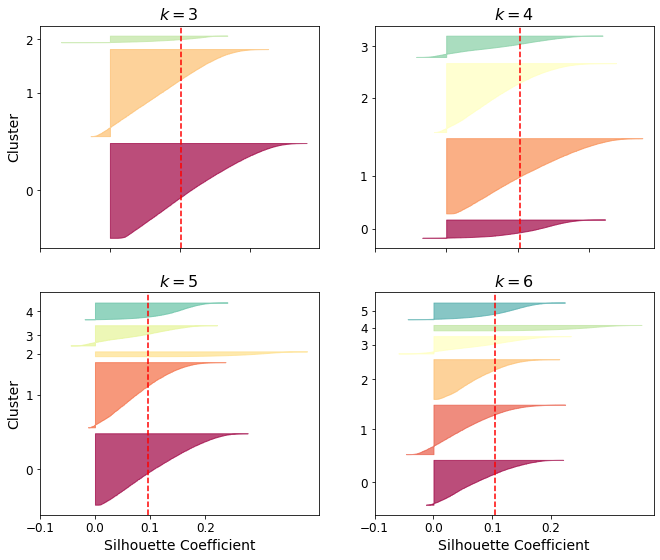

In [22]:
plt.figure(figsize=(11, 9))

for k in tqdm((3, 4, 5, 6)):
    plt.subplot(2, 2, k - 2)
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_pca, y_pred)

    padding = len(X_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    if k in (3, 4, 5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.1, 0.2])
    if k in (5, 6):
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

As you can see, $k=6$ looks like the best option here, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.

In [18]:
# best_model = kmeans_per_k[best_index]
best_model = KMeans(n_clusters=6, random_state=1)
best_model.fit(X_pca)
cluster_labels = best_model.labels_
num_dataset = num_dataset.assign(cluster=cluster_labels)
num_dataset.head(3)

,mean_desc_name_len,monetary_value,mean_review_score,mean_photos_qty,nb_items,nb_unique_items,price,freight_value,mean_prod_name_len,review_nb,comment_msg_nb,payment_type_nb,payment_instlmt_nb,latitude,longitude,frequency,recency,day,month,hour,cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,236.0,141.90,5.0,1.0,1.0,1.0,129.9,12.00,60.0,1.0,1.0,1.0,8.0,-23.337679,-46.826739,1,112,10,5,10,1
0000b849f77a49e4a4ce2b2a4ca5be3f,635.0,27.19,4.0,1.0,1.0,1.0,18.9,8.29,56.0,1.0,0.0,1.0,1.0,-23.557876,-46.788754,1,115,7,5,11,0
0000f46a3911fa3c0805444483337064,177.0,86.22,3.0,3.0,1.0,1.0,69.0,17.22,49.0,1.0,0.0,1.0,8.0,-27.543787,-48.631973,1,537,10,3,21,1


We are able to apply our best model to new customers : for instance, let's create 3 new customers based on 3 customers we already observed, adding some noise to their attributes :

In [19]:
np.random.seed(1)
first_customer = X_pca[0]
second_customer = X_pca[10]
third_customer = X_pca[2000]
noise = np.random.normal(0, 0.05, X_pca.shape[1])
new_customer_1 = first_customer + noise
new_customer_2 = second_customer + noise
new_customer_3 = third_customer + noise

__Hard clustering :__ the first new customer belongs to cluster 1, the second one belongs to cluster 0, and the third one belongs to cluster 4.

In [20]:
best_model.predict([new_customer_1,
                    new_customer_2,
                    new_customer_3])

array([1, 0, 4])

__Soft clustering :__ the first new client is at a distance of :
- 3.91 from the first centroid
- 3.16 from the second centroid
- 6.74 from the third centroid, and so on.

In [21]:
best_model.transform([new_customer_1,
                      new_customer_2,
                      new_customer_3])

array([[ 3.90883936,  3.16276795,  6.7357698 ,  4.30390897,  4.95144814,
        16.12757579],
       [ 4.07302798,  5.4910815 ,  7.4512381 ,  4.95033055,  6.16015937,
        16.34499955],
       [ 4.64811367,  4.38972335,  7.00904844,  5.03960212,  2.54966488,
        16.26600089]])

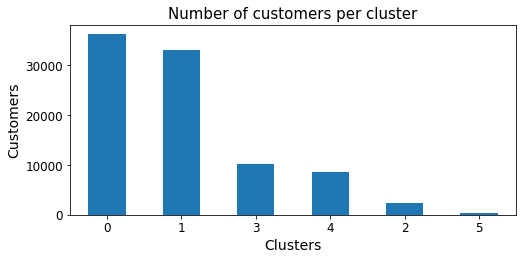

In [22]:
num_dataset['cluster'].value_counts().plot(
    kind='bar', figsize=(8, 3.5))
plt.title("Number of customers per cluster", fontsize=15)
plt.xticks(rotation=0)
plt.xlabel("Clusters")
plt.ylabel("Customers")
plt.show()

In [23]:
num_dataset.cluster.value_counts(normalize=True)

0    0.398884
1    0.363839
3    0.112798
4    0.093379
2    0.026706
5    0.004394
Name: cluster, dtype: float64

## Relative importance of cluster attributes

- Useful technique to identify relative importance of each cluster's attribute
- Calculate average values of each cluster
- Calculate average values of population
- Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average)

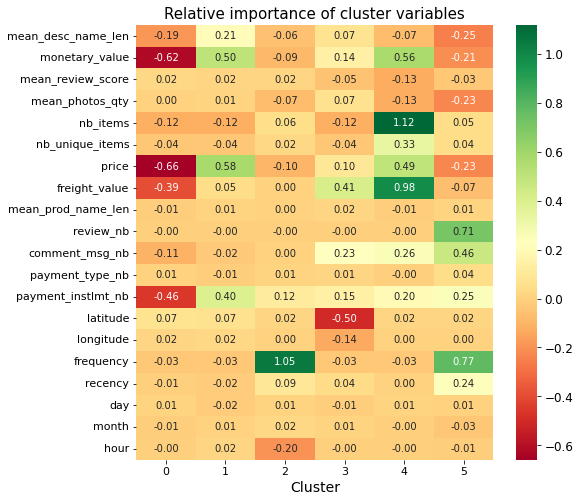

In [25]:
features = [f for f in num_dataset.columns if f not in 'cluster']
cluster_avg = num_dataset.groupby('cluster')[features].mean()
population_avg = num_dataset[features].mean()
relative_imp = cluster_avg / population_avg - 1

plt.figure(figsize=(8, 8))
sns.heatmap(relative_imp.T, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title("Relative importance of cluster variables",
          fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Cluster")
plt.show()

In [30]:
d = pd.concat([cluster_avg.iloc[5], population_avg], axis=1)
d.columns = ['cluster 5', 'global mean']
d

,cluster 5,global mean
mean_desc_name_len,596.207105,795.333323
monetary_value,126.905349,160.216282
mean_review_score,4.031380,4.154940
mean_photos_qty,1.734244,2.256454
nb_items,1.192020,1.139016
nb_unique_items,1.082294,1.037413
price,105.636322,137.388778
freight_value,21.275175,22.795094
mean_prod_name_len,49.260306,48.871968
review_nb,1.715711,1.003145


Let's dive into each of these clusters :

- __Cluster 0 :__ Cluster with the lowest expenditures (-60% compared with the global mean), no installments, the product description are quite short (-19% compared with the global mean), purchased once, did not comment.
- __Cluster 1 :__ Cluster with one of the highest monetary value (+50% compared with the global mean), with the highest payment installment number. the product description are 21% bigger than the global mean. 
- __Cluster 2 :__ Small cluster of customers who purchased several times, relatively earlier during the day than the other customers. Quite inactive.
- __Cluster 3 :__ Cluster customers living far from Brazil (i.e. Portugal), with quite high freight value (+41% than the global mean).
- __Cluster 4 :__ Cluster with the highest monetary value (+56% than the global mean), with lot of items within orders, the highest freight value (+98% from the global mean), with comments.
- __Cluster 5 :__ Cluster with quite low monetary value (-21% than the global mean), purchased more than one time, the highest number of reviews and comments, the highest recency (+24% than the global mean), which means that they churned.

In [120]:
cluster_avg

,mean_desc_name_len,monetary_value,mean_review_score,mean_photos_qty,nb_items,nb_unique_items,price,freight_value,mean_prod_name_len,review_nb,comment_msg_nb,payment_type_nb,payment_instlmt_nb,latitude,longitude,frequency,recency,day,month,hour
cluster,,,,,,,,,,,,,,,,,,,,
0,644.210143,60.802839,4.257315,2.267494,1.001786,1.000137,46.882271,13.911894,48.255433,1.000000,0.362400,1.051512,1.581499,-22.748822,-46.923050,1.000000,236.924943,15.736778,5.987857,14.718289
1,963.421042,240.460085,4.242794,2.288214,1.000060,1.000000,216.530292,23.885718,49.400108,1.000000,0.398121,1.030541,4.070148,-22.670641,-47.268775,1.000000,234.717569,15.278124,6.074877,14.965965
2,747.520358,146.242376,4.236767,2.094790,1.202093,1.061551,123.276235,22.826348,49.052823,1.000000,0.407879,1.059089,3.260771,-21.614511,-46.326270,2.119819,260.645466,15.732048,6.176857,11.784161
3,853.726610,182.831272,3.945691,2.409842,1.001943,1.000680,150.542628,32.251261,49.622559,1.000000,0.501992,1.059652,3.341494,-10.511267,-39.922310,1.000000,247.933353,15.331293,6.112795,14.656077
4,738.459714,250.465241,3.610492,1.971075,2.411689,1.377773,205.280023,45.131765,48.471097,1.000000,0.511208,1.043422,3.490318,-21.566842,-46.376915,1.000000,238.779017,15.736533,6.027579,14.690881
5,596.207105,126.905349,4.031380,1.734244,1.192020,1.082294,105.636322,21.275175,49.260306,1.715711,0.596010,1.091022,3.639651,-21.523989,-46.241284,1.832918,295.249377,15.635910,5.832918,14.573566


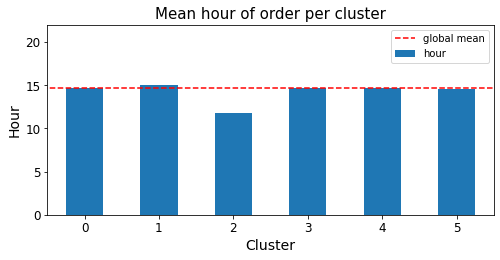

In [112]:
plt.figure(figsize=(8, 3.5))
num_dataset.groupby('cluster')['hour'].mean().plot(kind='bar')
plt.hlines(y=num_dataset.hour.mean(), xmin=-1, xmax=6,
           color="red", linestyle="--", label='global mean')
plt.xticks(rotation=0)
plt.title("Mean hour of order per cluster", fontsize=15)
plt.ylabel("Hour")
plt.xlabel("Cluster")
plt.ylim([0, 22])
plt.legend()
plt.show()

## Categorical feature distributions per cluster

In [113]:
final_dataset['cluster'] = num_dataset['cluster'].values

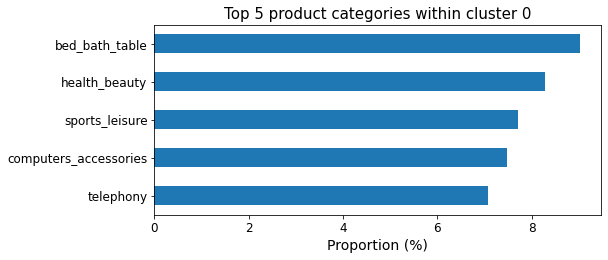

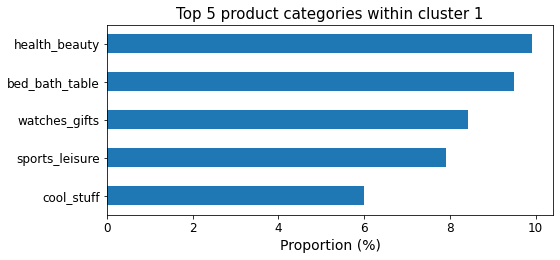

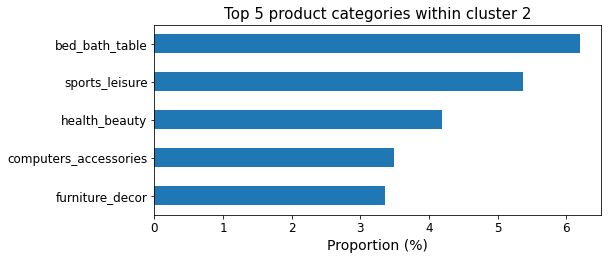

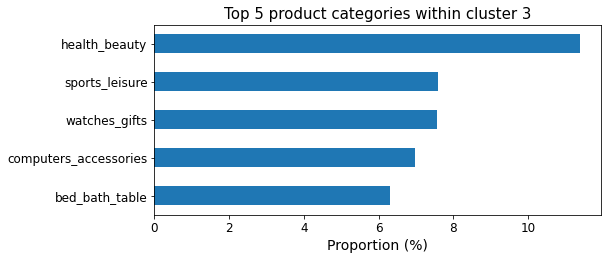

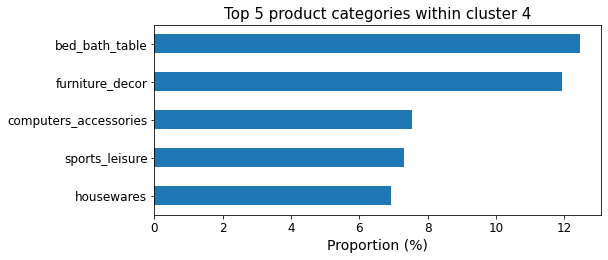

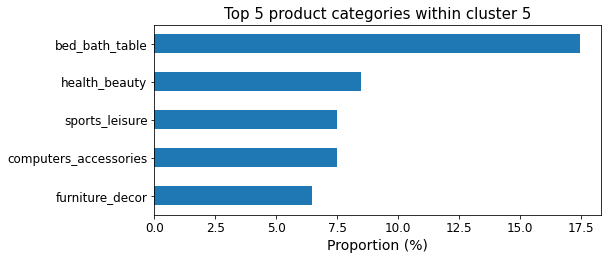

In [114]:
for c in range(6):
    plt.figure(figsize=(8, 3.5))
    final_dataset[final_dataset['cluster'] == c][
        'product_category_name'].value_counts(
        normalize=True).head(5).mul(100).sort_values().plot(kind='barh')
    plt.title("Top 5 product categories within cluster " + str(c),
              fontsize=15)
    plt.xlabel("Proportion (%)")
    plt.show()

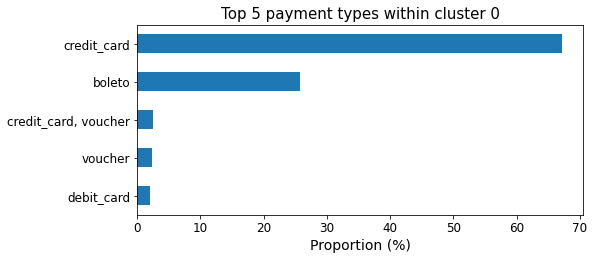

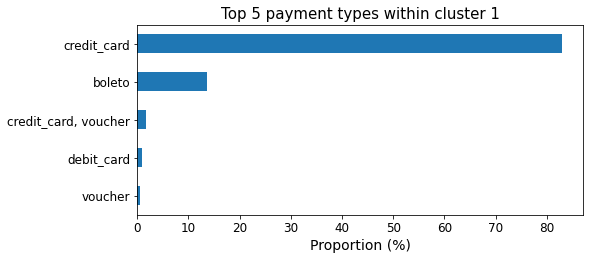

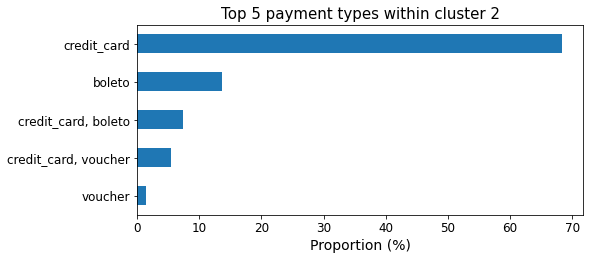

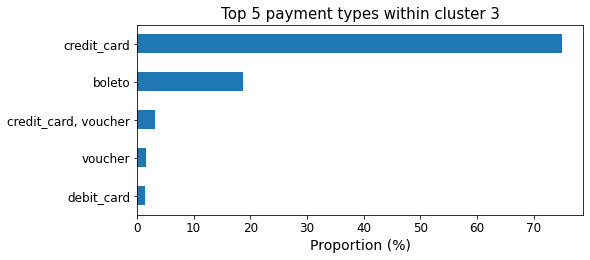

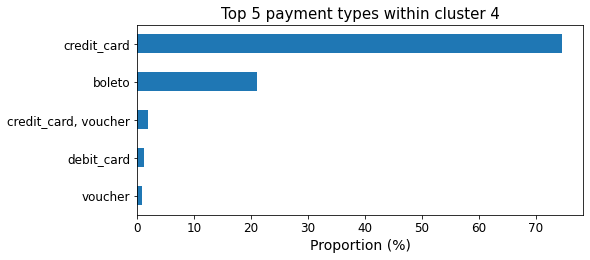

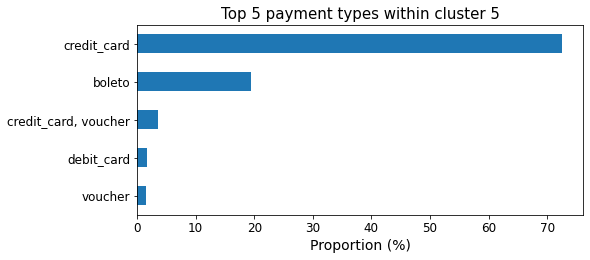

In [115]:
for c in range(6):
    plt.figure(figsize=(8, 3.5))
    final_dataset[final_dataset['cluster'] == c][
        'payment_type'].value_counts(
        normalize=True).head(5).mul(100).sort_values().plot(kind='barh')
    plt.title("Top 5 payment types within cluster " + str(c),
              fontsize=15)
    plt.xlabel("Proportion (%)")
    plt.show()

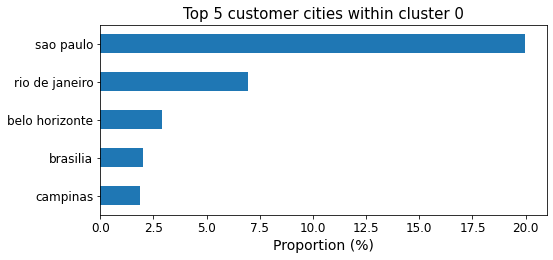

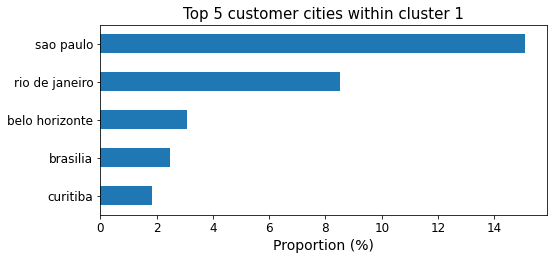

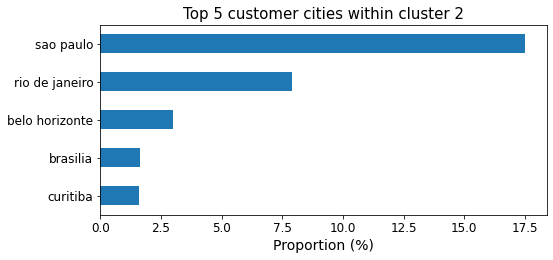

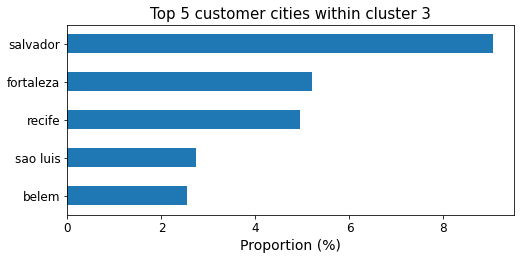

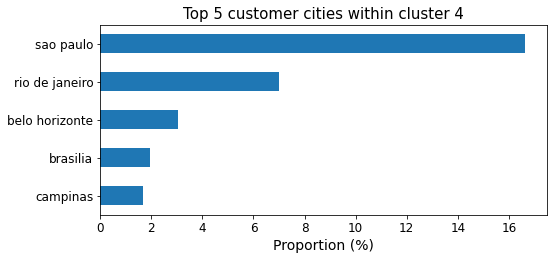

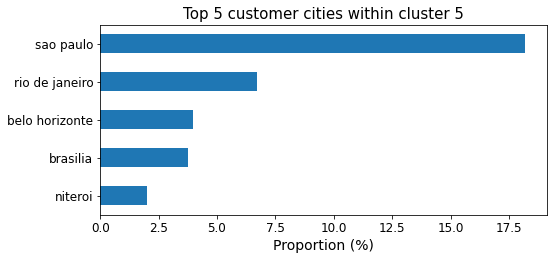

In [116]:
for c in range(6):
    plt.figure(figsize=(8, 3.5))
    final_dataset[final_dataset['cluster'] == c][
        'customer_city'].value_counts(
        normalize=True).head(5).mul(100).sort_values().plot(kind='barh')
    plt.title("Top 5 customer cities within cluster " + str(c),
              fontsize=15)
    plt.xlabel("Proportion (%)")
    plt.show()

In [117]:
d = pd.DataFrame({'c1': X_pca[:, 0],
                  'c2': X_pca[:, 1],
                  'cluster': cluster_labels})
d['cluster'] = d['cluster'].astype(str)
d.head()

,c1,c2,cluster
0,0.375693,-0.409679,1
1,-3.046436,0.122266,0
2,-0.361409,-1.142270,1
3,-0.530462,1.624747,3
4,1.084684,-1.121637,1


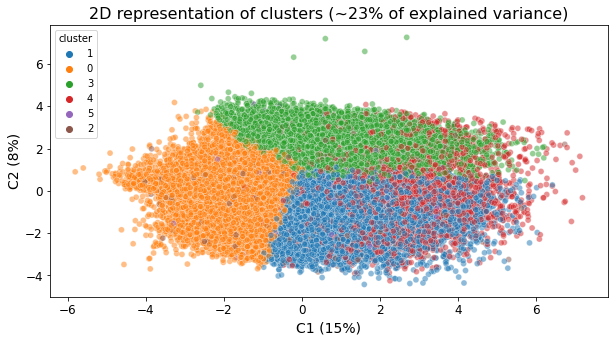

In [119]:
plt.figure(figsize=(10, 5))
ev1 = pca.explained_variance_ratio_[0]
ev2 = pca.explained_variance_ratio_[1]
sns.scatterplot(data=d, x='c1', y='c2', hue="cluster", alpha=0.5)
plt.title("2D representation of clusters (~23% of explained variance)",
          fontsize=16)
plt.xlabel("C1 ({:.0%})".format(ev1))
plt.ylabel("C2 ({:.0%})".format(ev2))
plt.show()